In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, classification_report

import firebase_admin
from firebase_admin import credentials, firestore
from torchvision import datasets

#### Firebase Setup ##################################################################################################################
if not firebase_admin._apps:
    cred = credentials.Certificate('serviceAccount.json')
    firebase_admin.initialize_app(cred)
db = firestore.client()

print("Firebase ok")

/home/andrea/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Firebase ok


In [2]:
docs = db.collection('kosmos2_miniImageNet').stream()

true_labels = []
predicted_labels = []

for doc in docs:
    if doc.id == "last_index":
        continue
    doc_ref = db.collection('kosmos2_miniImageNet').document(doc.id)
    doc_dict = doc.to_dict()
    true_labels.append(doc_dict['True Label'])
    predicted_labels.append(doc_dict['Predicted Label'])

labels = np.unique(np.concatenate((predicted_labels, true_labels)))
labels

array(['African_hunting_dog', 'Arctic_fox', 'French_bulldog',
       'Gordon_setter', 'Ibizan_hound', 'Newfoundland', 'Saluki',
       'Tibetan_mastiff', 'Walker_hound', 'aircraft_carrier', 'ant',
       'ashcan', 'barrel', 'beer_bottle', 'black-footed_ferret', 'bolete',
       'bookshop', 'boxer', 'cannon', 'carousel', 'carton', 'catamaran',
       'chime', 'cliff', 'clog', 'cocktail_shaker', 'combination_lock',
       'consomme', 'coral_reef', 'crate', 'cuirass', 'dalmatian',
       'dishrag', 'dome', 'dugong', 'ear', 'electric_guitar', 'file',
       'fire_screen', 'frying_pan', 'garbage_truck', 'golden_retriever',
       'goose', 'green_mamba', 'hair_slide', 'harvestman', 'holster',
       'horizontal_bar', 'hotdog', 'hourglass', 'house_finch', 'iPod',
       'jellyfish', 'king_crab', 'komondor', 'ladybug', 'lion',
       'lipstick', 'malamute', 'meerkat', 'miniature_poodle', 'miniskirt',
       'missile', 'mixing_bowl', 'nematode', 'oboe', 'orange', 'organ',
       'parallel_bars'

In [3]:
for el in predicted_labels:
    if (el not in labels):
        print(f"ERROR: {el}")

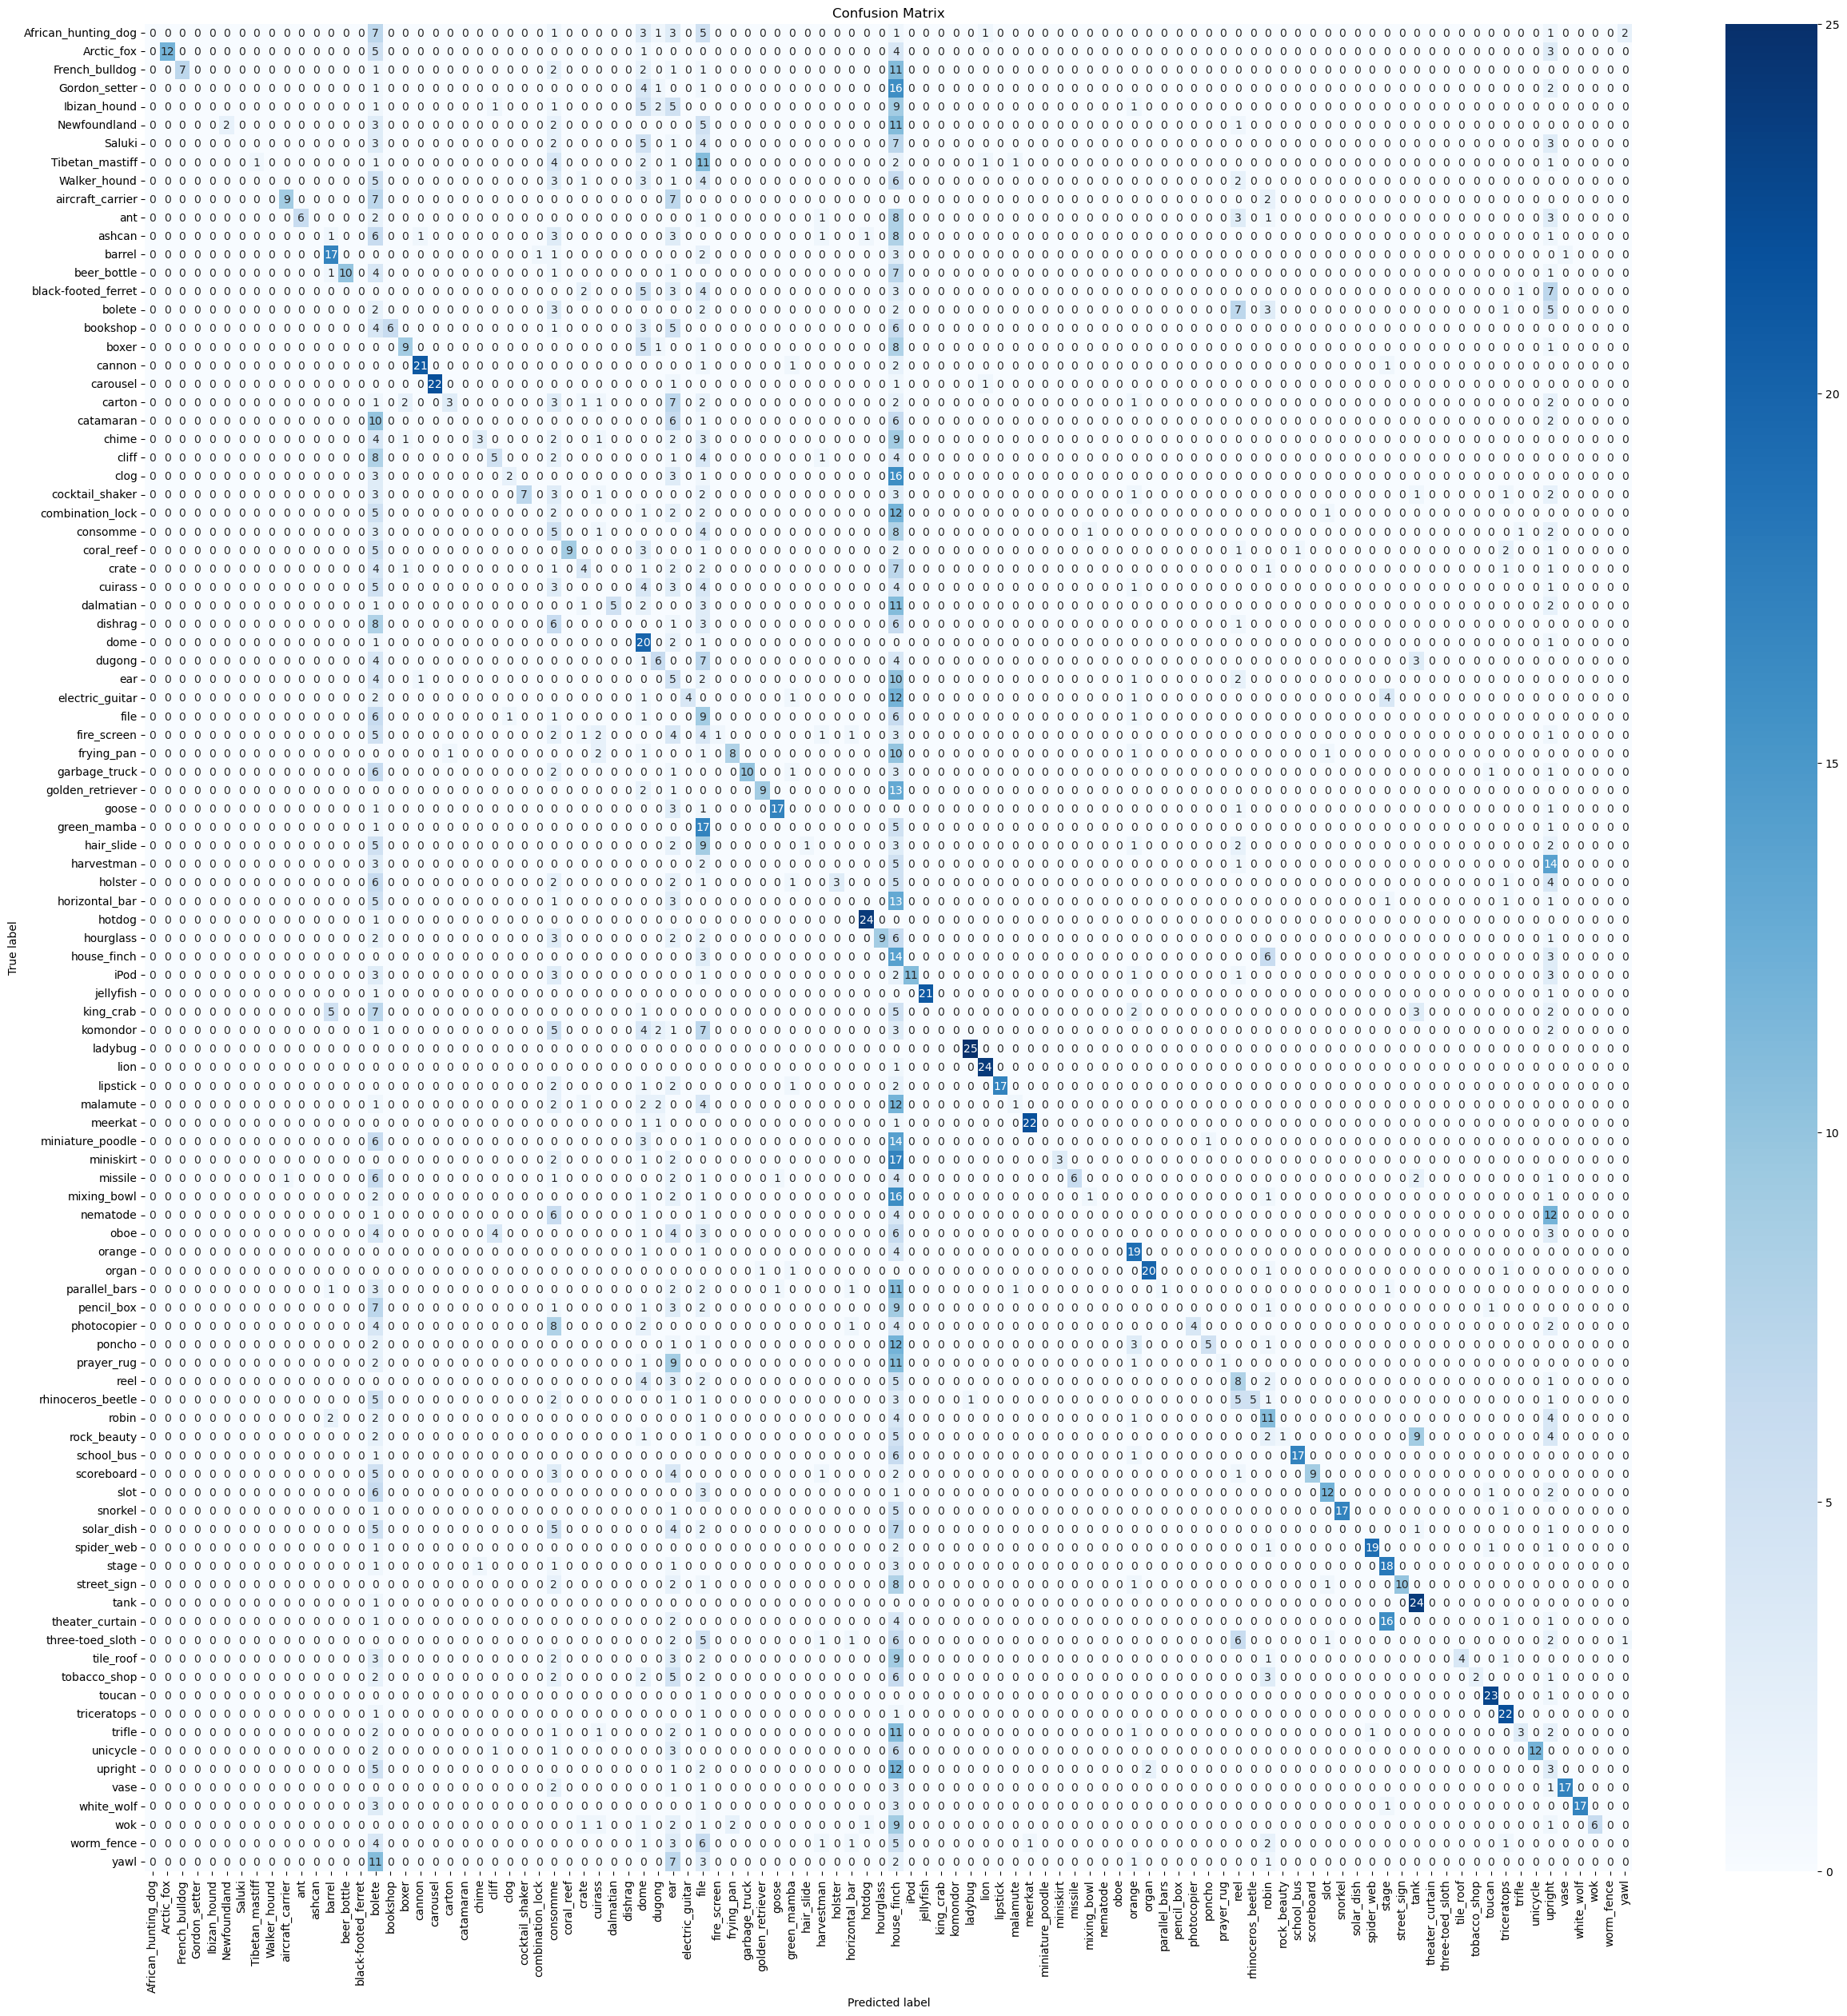

In [4]:
confusion_mat = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(30, 30))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [5]:
print(classification_report(true_labels, predicted_labels, target_names=labels))

                     precision    recall  f1-score   support

African_hunting_dog       0.00      0.00      0.00        25
         Arctic_fox       1.00      0.48      0.65        25
     French_bulldog       1.00      0.28      0.44        25
      Gordon_setter       0.00      0.00      0.00        25
       Ibizan_hound       0.00      0.00      0.00        25
       Newfoundland       1.00      0.08      0.15        24
             Saluki       0.00      0.00      0.00        25
    Tibetan_mastiff       1.00      0.04      0.08        25
       Walker_hound       0.00      0.00      0.00        25
   aircraft_carrier       0.90      0.36      0.51        25
                ant       1.00      0.24      0.39        25
             ashcan       0.00      0.00      0.00        25
             barrel       0.63      0.68      0.65        25
        beer_bottle       1.00      0.40      0.57        25
black-footed_ferret       0.00      0.00      0.00        25
             bolete    

/home/andrea/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrea/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrea/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
